# 音声認識システム

## １章
　道路状況認識システムすごいのでみてね

## パターン認識システムの構成


入力
↓
前処理部
  * 信号のディジタル化
  * ノイズ除去
↓
特徴抽出部
  * 識別に役立つ情報をベクトルの形で抽出
↓
識別部  - 識別辞書
  * 識別されたベクトルと識別辞書の項目を比較し、出力を決定
↓
出力

* 特徴ベクトルを受け取る
* 特徴空間でクラスタ＝識別する

### 最近傍決定則（ NN 法）

* 一番近いものを見つける方法　シンプルで精度あるが処理時間がかかるらしい
* 参考：　http://qiita.com/HirofumiYashima/items/7f0aca399bb35e73ec3f
* irisデータセットを使う。

#### 最近傍法を実装した場合

In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score


class NearestNeighbors(object):

    def __init__(self):
        self._train_data = None
        self._target_data = None

    def fit(self, train_data, target_data):
        """訓練データを学習する"""
        # あらかじめ計算しておけるものが特にないので保存だけする
        self._train_data = train_data
        self._target_data = target_data

    def predict(self, x):
        """訓練データから予測する"""
        # 判別する点と教師データとのユークリッド距離を計算する
        distances = np.array([self._distance(p, x) for p in self._train_data])
        # 最もユークリッド距離の近い要素のインデックスを得る
        nearest_index = distances.argmin()
        # 最も近い要素のラベルを返す
        return self._target_data[nearest_index]

    def _distance(self, p0, p1):
        """二点間のユークリッド距離を計算する"""
        return np.sum((p0 - p1) ** 2)


def main():
    # Iris データセットをロードする
    iris_dataset = datasets.load_iris()

    # 特徴データとラベルデータを取り出す
    features = iris_dataset.data
    targets = iris_dataset.target
    print("features : \n" +  str(features))
    print("targets : \n" +  str(targets))
    
    # LOO 法で汎化性能を調べる ※ひとつだけ別に取り出す交差確認(Leave-one-out Cross-Validation)
    predicted_labels = []

    loo = LeaveOneOut()
    for train, test in loo.split(features):
        train_data = features[train]
        target_data = targets[train]

        # モデルを学習させる
        model = NearestNeighbors()
        model.fit(train_data, target_data)
        
        # 一つ抜いたテストデータを識別させる
        predicted_label = model.predict(features[test])
        predicted_labels.append(predicted_label)

    # 正解率を出力する
    score = accuracy_score(targets, predicted_labels)
    print(score)


if __name__ == '__main__':
    main()

features : 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]

#### scikit-learn を使う場合

In [33]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1) # 直近Nつから多数決で判定

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

# データ
train_data = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]
# 正解ラベル
train_label = [0,0,0,1,1,1,2,2,2] 

knn.fit(train_data, train_label)

result = knn.predict(3.5)
print("3.5 : " + str(result))
result = knn.predict(3.6)
print("3.6 : " + str(result))
result = knn.predict(10.5)
print("10.5 : " + str(result))

3.5 : [0]
3.6 : [1]
10.5 : [2]


## ２章
　フーリエ変換する理由は、人間がそう音を聴いているから  
　エッジフィルタ　畳み込みネットワーク　大事  
　フーリエ変換の仕組みや式はおいおい理解すること  
　→http://iphone.moo.jp/app/?p=374 
 　　フーリエ変換を行えば、「信号に含まれる周波数の成分比」を得ることが出来ます。本質はこれだけです。
　→★実際に実装して最終理解したい  

[   0.95105652 +0.00000000e+00j    0.95119220 -5.21996581e-03j
    0.95159939 -1.04425596e-02j    0.95227858 -1.56704142e-02j
    0.95323054 -2.09061727e-02j    0.95445639 -2.61524931e-02j
    0.95595754 -3.14120535e-02j    0.95773575 -3.66875574e-02j
    0.95979311 -4.19817392e-02j    0.96213204 -4.72973691e-02j
    0.96475529 -5.26372591e-02j    0.96766598 -5.80042686e-02j
    0.97086760 -6.34013103e-02j    0.97436398 -6.88313564e-02j
    0.97815936 -7.42974452e-02j    0.98225837 -7.98026875e-02j
    0.98666604 -8.53502737e-02j    0.99138784 -9.09434813e-02j
    0.99642968 -9.65856825e-02j    1.00179792 -1.02280353e-01j
    1.00749942 -1.08031078e-01j    1.01354154 -1.13841567e-01j
    1.01993217 -1.19715657e-01j    1.02667974 -1.25657328e-01j
    1.03379330 -1.31670710e-01j    1.04128249 -1.37760097e-01j
    1.04915761 -1.43929962e-01j    1.05742966 -1.50184964e-01j
    1.06611035 -1.56529971e-01j    1.07521219 -1.62970066e-01j
    1.08474849 -1.69510575e-01j    1.09473345 -1.761570

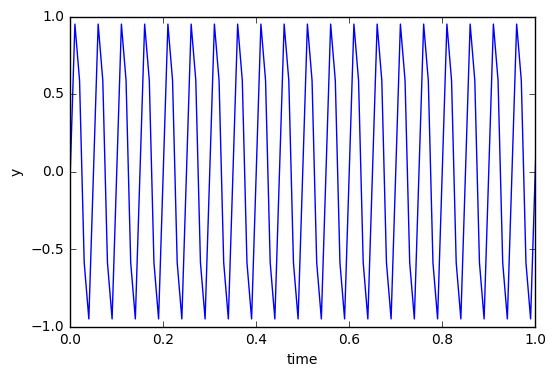

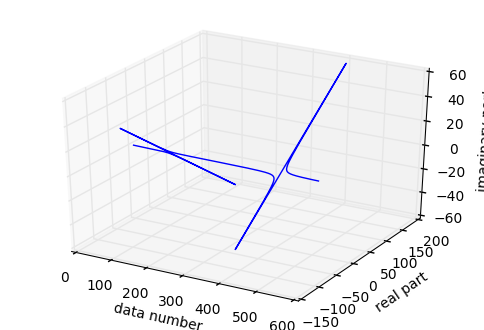

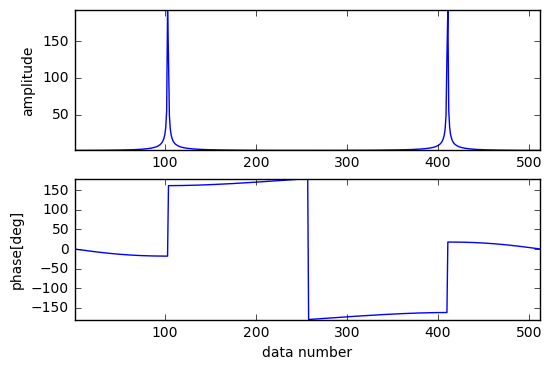

In [39]:
# http://org-technology.com/posts/fft-01.html
# 時系列のサンプルデータとして、データ数 512 点、サンプリング間隔 dt=0.01[sec]、
# 周波数 f=20[Hz]の sin 波を作成し、それを fft 関数で離散フーリエ変換しています。

import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 時系列のサンプルデータ作成
N = 512                         # データ数
dt = 0.01                       # サンプリング間隔
f = 20                          # 周波数
t = np.linspace(1, N, N)*dt-dt #linspace(0, 512, 512) # 0から512までの間で512個の要素を作ること * 0.01 - 0.01
# print(t)
y = np.sin(2*np.pi*f*t)
# print(y)
# 離散フーリエ変換
yf = fft(y)
# print(yf)

# プロット
# 時系列データ
plt.figure(1)
plt.plot(t, y)
plt.xlim(0, 1)
plt.xlabel("time")
plt.ylabel("y")

# 離散フーリエ変換の結果
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(np.linspace(1, N, N), np.real(yf), np.imag(yf))
ax.set_xlabel("data number")
ax.set_ylabel("real part")
ax.set_zlabel("imaginary part")

# 大きさ、位相
plt.figure(3)
plt.subplot(211)
plt.plot(np.linspace(1, N, N), np.abs(yf))
plt.axis('tight')
plt.ylabel("amplitude")
plt.subplot(212)
plt.plot(np.linspace(1, N, N), np.degrees(np.angle(yf)))
plt.axis('tight')
plt.xlabel("data number")
plt.ylabel("phase[deg]")

# plt.show()

## ３章
　MFCCはもう一度フーリエ変換したもの  
　　メル周波数ケプストラム係数（Mel-Frequency Cepstrum Coefficients）  
　　http://aidiary.hatenablog.com/entry/20100829/1283068351  
　　★pythonで色々アルゴリズム実装している　参考になる  

　シフト特徴量　１２８次元で画像は特徴をとらえる　  
　Bag of Words  
　主成分分析　復習すること  
　　→次元を減らすこと　特徴量をキープしたまま  